## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read dataset

In [2]:
df=pd.read_csv("Pokemon.csv",encoding='Latin-1',index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Scatterplot

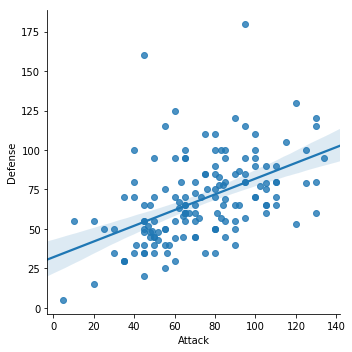

In [3]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

## Removing regression line and highlighting stages

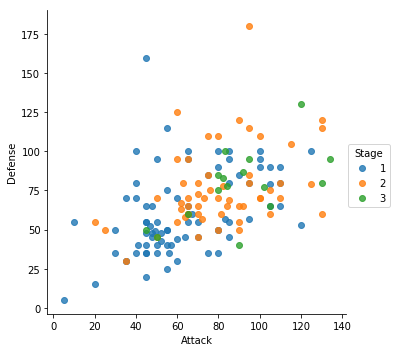

In [4]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

# Boxplot

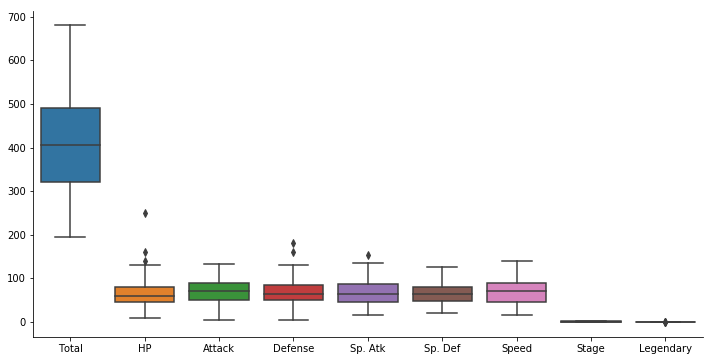

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
sns.despine()

## Plotting only stats

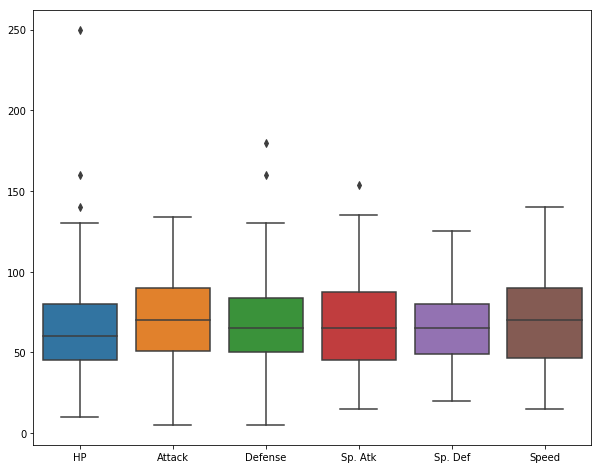

In [6]:
stats_df=df.drop(['Total','Stage','Legendary'],axis=1)
plt.figure(figsize=(10,8))
sns.boxplot(data=stats_df)

# Seaborn themes and violinplot

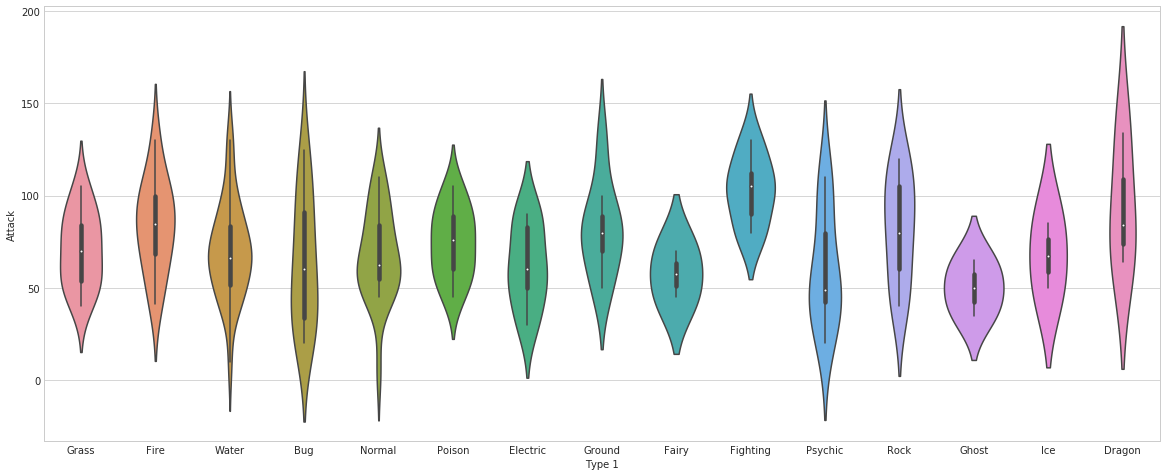

In [7]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(20,8))
sns.violinplot(x='Type 1', y='Attack', data=df)

## Making and setting color palettes

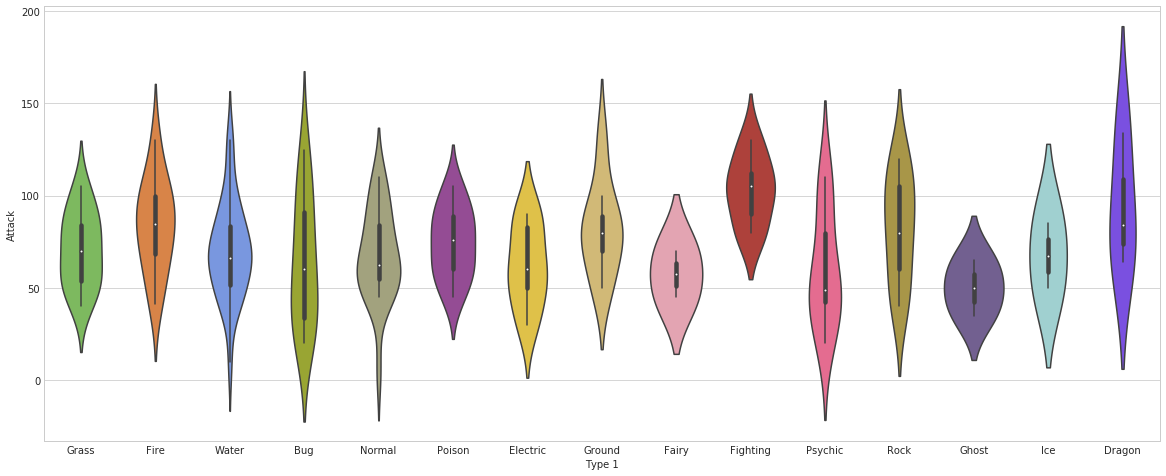

In [8]:
# making palette
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# set palette
#sns.set_palette(pkmn_type_colors)

# Violin plot
plt.figure(figsize=(20,8))
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette


# Swarm plots

Text(0,0.5,'Attack')

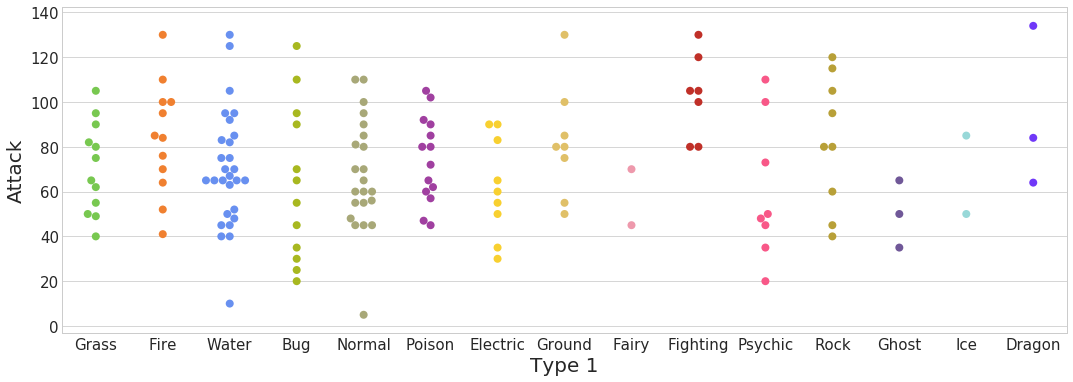

In [9]:
# Swarm plot with Pokemon color palette
plt.figure(figsize=(18,6))
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors,s=8)
# Editing xlabels and ylabels using matplotlib
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(s='Type 1',fontsize=20)
plt.ylabel(s='Attack',fontsize=20)

# overlaying swarm and viloin plots

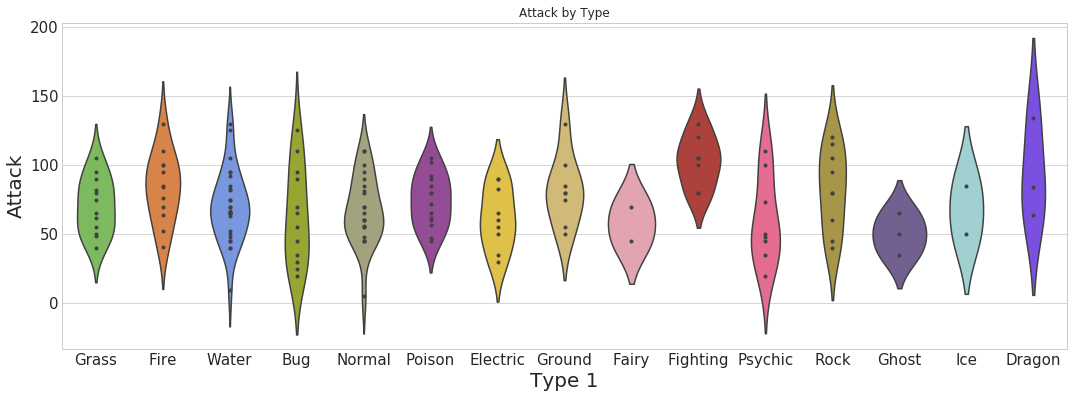

In [53]:
# Set figure size with matplotlib
plt.figure(figsize=(18,6))
 
# Create plot
ax=sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner='point', # Remove the bars inside the violins and replace it by points.
               palette=pkmn_type_colors)
 
'''
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
'''

# Editing xlabels and ylabels using matplotlib
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(s='Type 1',fontsize=20)
plt.ylabel(s='Attack',fontsize=20)
 
# Set title with matplotlib
plt.title('Attack by Type')

# show plot
plt.show()



# Putting It All Together

Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

To do so, we'll use Pandas's melt() function. It takes 3 arguments:

1. First, the DataFrame to melt.
2. Second, ID variables to keep (Pandas will melt all of the other ones).
3. Finally, a name for the new, melted variable.

In [11]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [12]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
5,Charizard,Fire,Flying,HP,78
6,Squirtle,Water,NaN,HP,44
7,Wartortle,Water,NaN,HP,59
8,Blastoise,Water,NaN,HP,79
9,Caterpie,Bug,NaN,HP,45


# Swarmplot with Melted DF

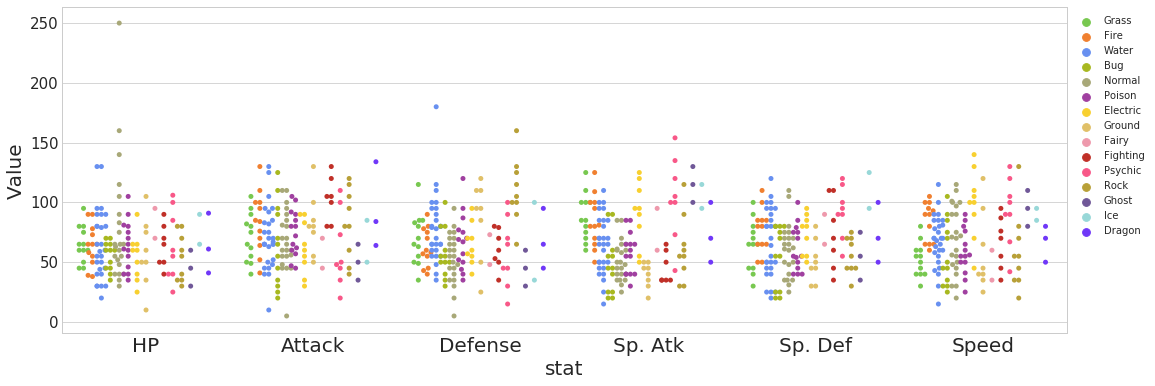

In [62]:
# 1. Enlarge the plot
plt.figure(figsize=(18,6))
 
ax=sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              s=5,
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
ax.set_xlabel('stat',size=20)
ax.set_ylabel('Value',size=20)
plt.xticks(size=20)
plt.yticks(size=15)

 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc='best')

# Heatmap
Heatmaps help you visualize matrix-like data.

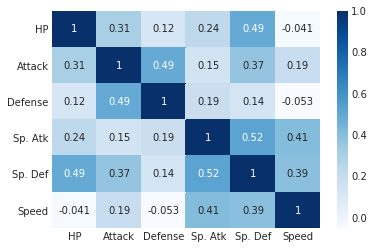

In [14]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr,annot=True,cmap="Blues")

# Histogram
Histograms allow you to plot the distributions of numeric variables.



/home/malhar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


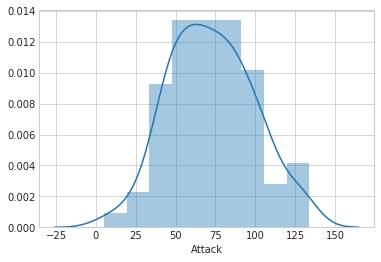

In [57]:
sns.distplot(df['Attack'])

# Count Plot
Count plots help you visualize the total count of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

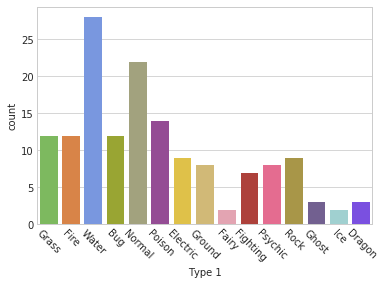

In [16]:
# Count Plot (a.k.a. Bar Plot)
ax=sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

# Factor Plot
Factor plots make it easy to separate plots by categorical classes.

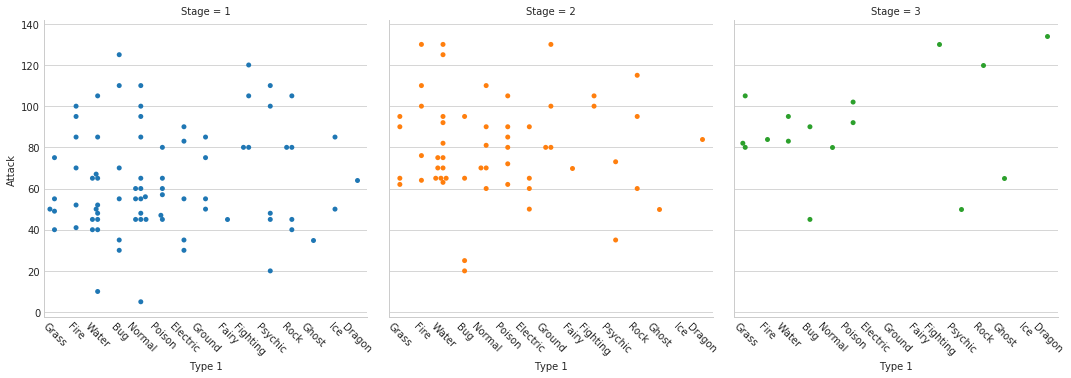

In [60]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm',
                   aspect=1,
                  size=5) # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

# Density Plot
Density plots display the distribution between two variables.

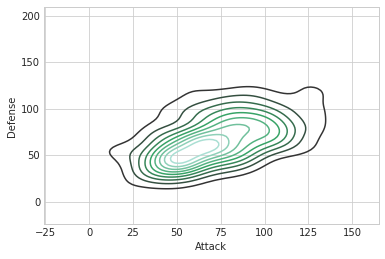

In [18]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

# Joint Distribution Plot
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.



/home/malhar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


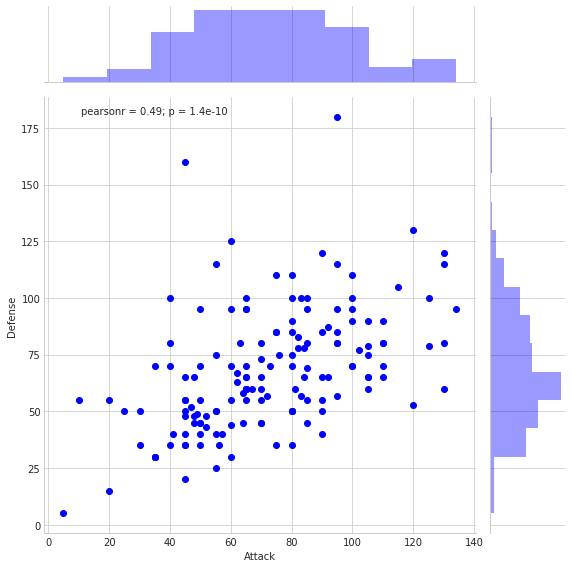

In [19]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df,size=8,color='b')